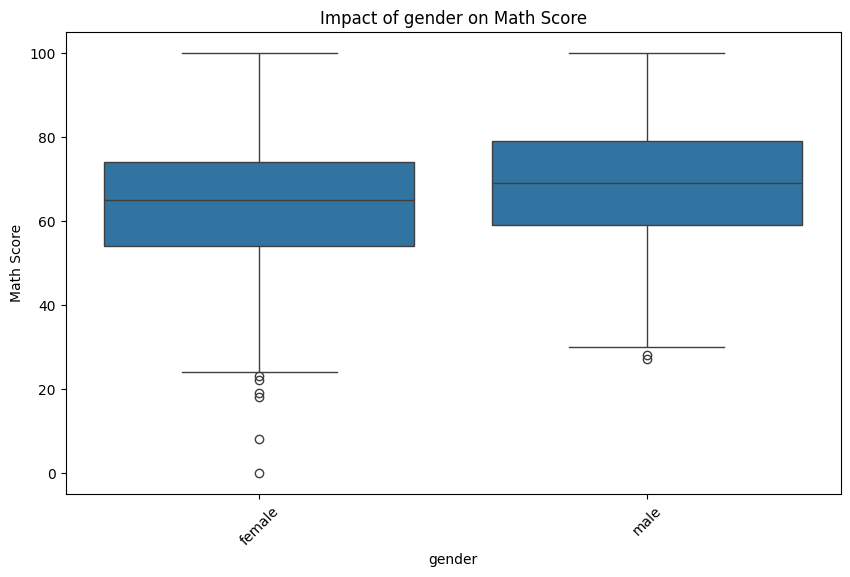

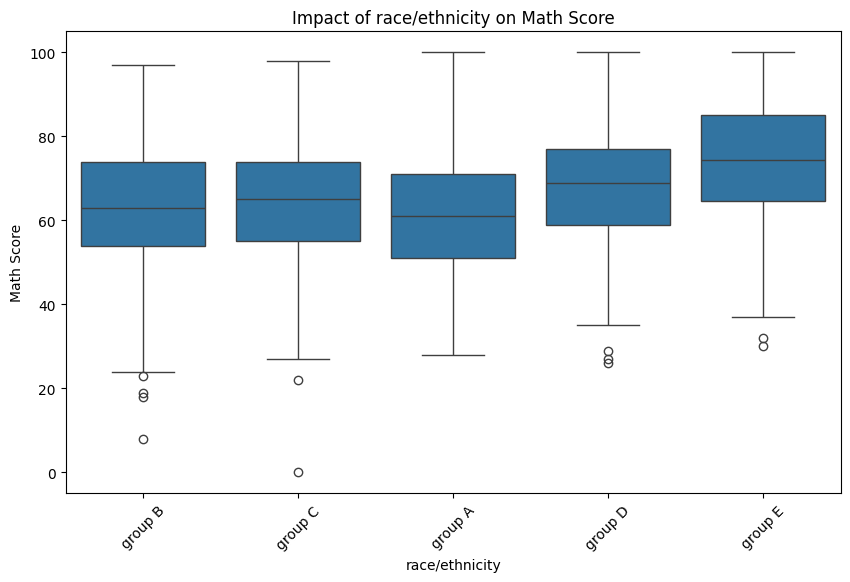

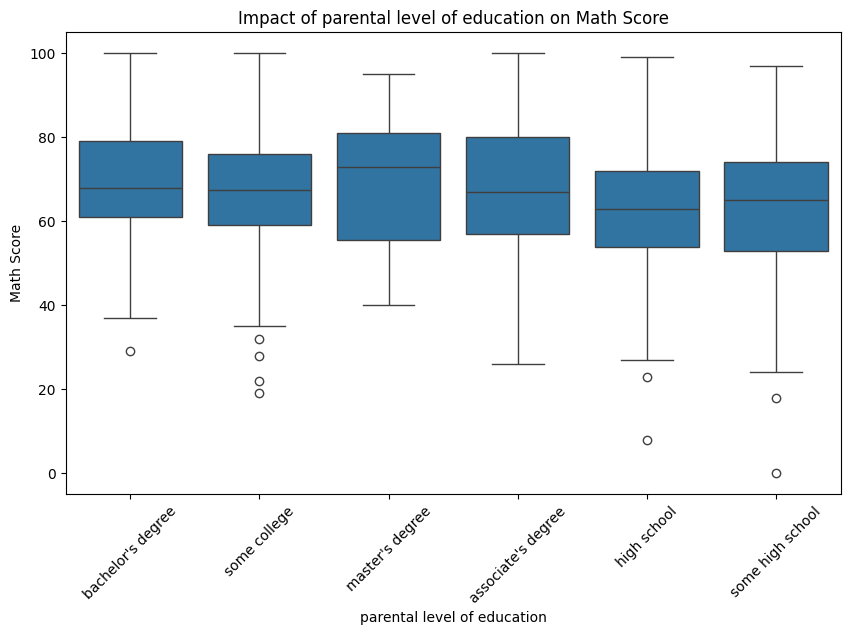

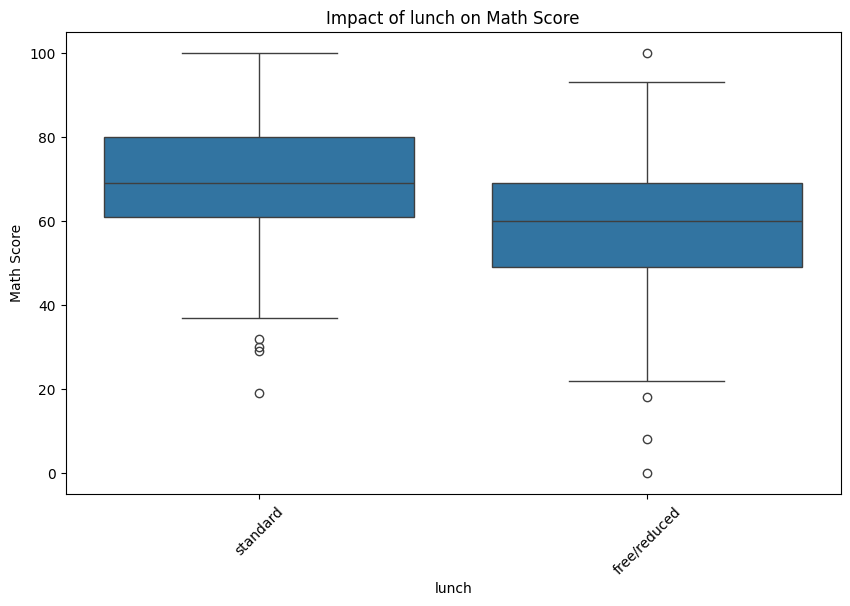

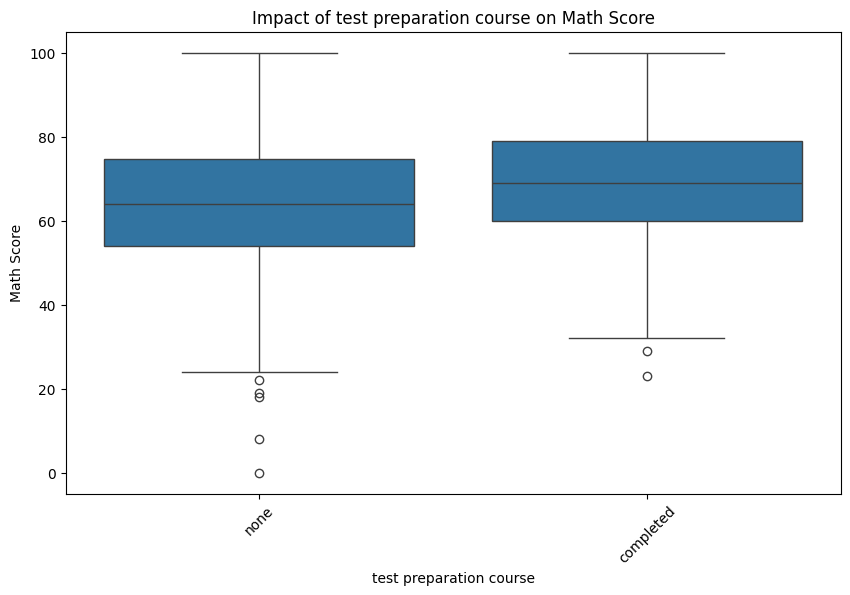

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Učitavanje dataset-a (prilagodite naziv fajla ako je drugačiji)
data = pd.read_csv("StudentsPerformance.csv")  # Ovde ubacite tačnu putanju do fajla

# Vizualizacija uticaja faktora na 'math score'
factors = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for factor in factors:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=factor, y='math score', data=data)
    plt.title(f"Impact of {factor} on Math Score")
    plt.xlabel(factor)
    plt.ylabel("Math Score")
    plt.xticks(rotation=45)
    plt.show()



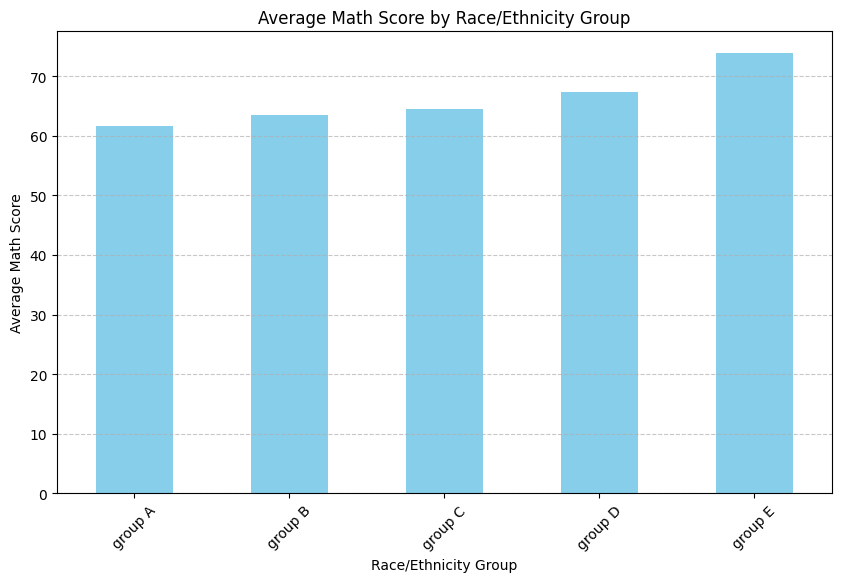

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Učitavanje dataset-a
data = pd.read_csv("StudentsPerformance.csv")  # Zamenite naziv fajla ako je drugačiji

# Prikaz prosečnog rezultata po grupama za 'race/ethnicity'
plt.figure(figsize=(10, 6))
average_scores = data.groupby('race/ethnicity')['math score'].mean().sort_values()
average_scores.plot(kind='bar', color='skyblue')
plt.title("Average Math Score by Race/Ethnicity Group")
plt.xlabel("Race/Ethnicity Group")
plt.ylabel("Average Math Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


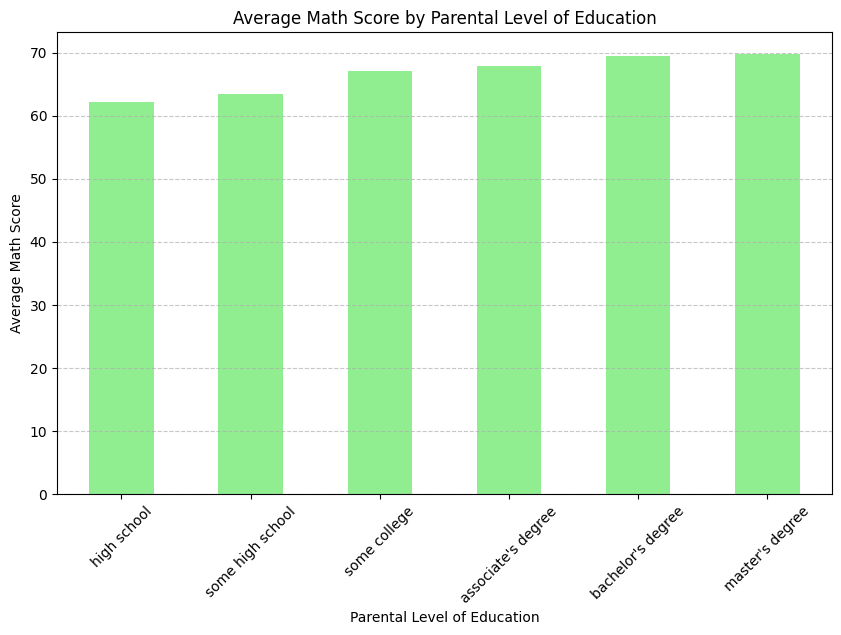

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Učitavanje dataset-a
data = pd.read_csv("StudentsPerformance.csv")  # Zamenite naziv fajla ako je drugačiji

# Prikaz prosečnog rezultata po nivoima obrazovanja roditelja za 'math score'
plt.figure(figsize=(10, 6))
average_scores_parent = data.groupby('parental level of education')['math score'].mean().sort_values()
average_scores_parent.plot(kind='bar', color='lightgreen')
plt.title("Average Math Score by Parental Level of Education")
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Math Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


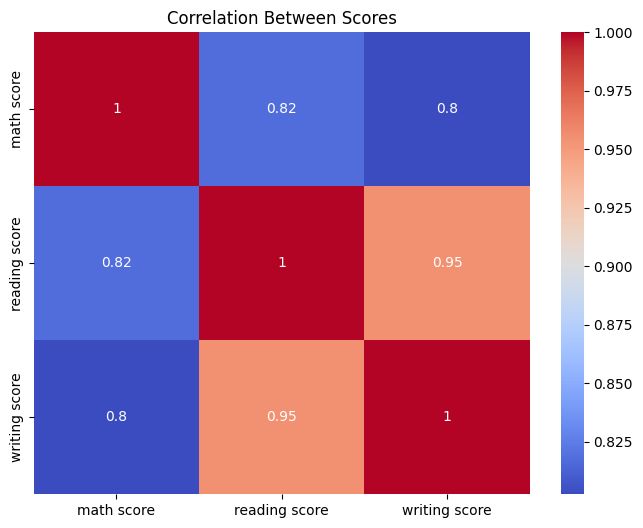

In [ ]:
# Korelacija između rezultata
plt.figure(figsize=(8, 6))
sns.heatmap(data[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Scores")
plt.show()


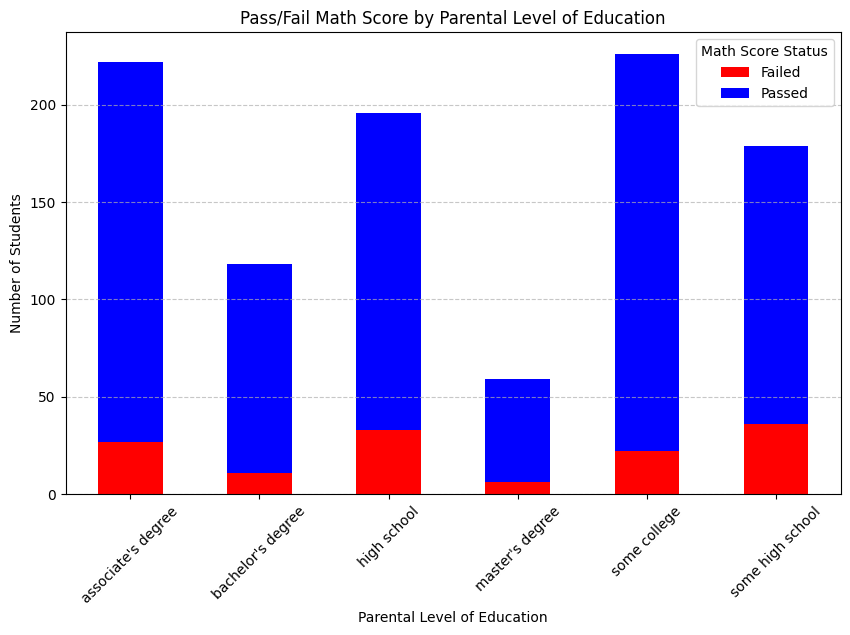

In [ ]:
# Dodavanje kolone koja označava da li je učenik položio ili ne (prolazni prag je 50)
data['math_passed'] = data['math score'] >= 50  # True ako je >= 50, False inače

# Grupisanje po 'parental level of education' i statusu polaganja
pass_fail_counts = data.groupby(['parental level of education', 'math_passed'])['math score'].count().unstack()

# Vizualizacija: Plavi stubovi za položene, crveni za nepoložene
pass_fail_counts.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(10, 6))
plt.title("Pass/Fail Math Score by Parental Level of Education")
plt.xlabel("Parental Level of Education")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.legend(["Failed", "Passed"], title="Math Score Status")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

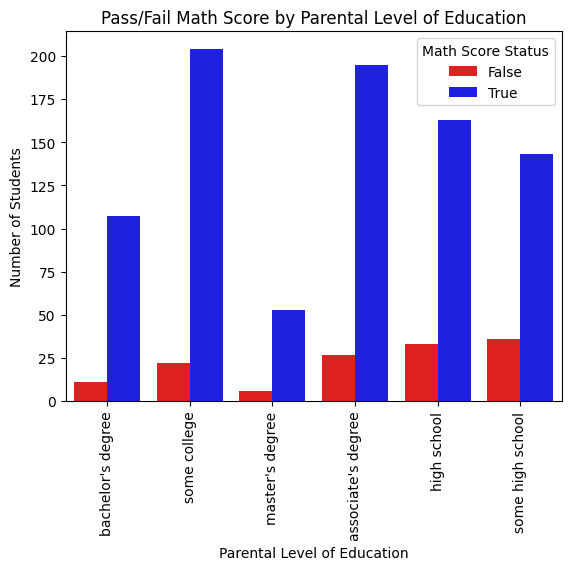

In [ ]:

data['math_passed']

custom_palette = {True:'blue', False:'red'}

p = sns.countplot(x='parental level of education', data=data, hue='math_passed', palette=custom_palette)
_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.title("Pass/Fail Math Score by Parental Level of Education")
plt.xlabel("Parental Level of Education")
plt.ylabel("Number of Students")
plt.legend(title="Math Score Status")
plt.show()


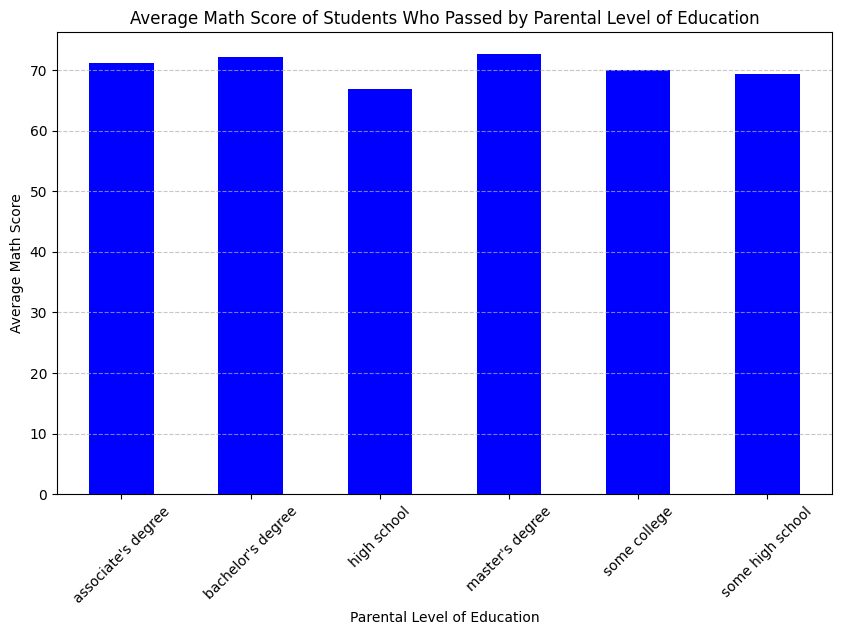

In [ ]:
# Filtriranje podataka samo za učenike koji su položili (math_passed = True)
passed_data = data[data['math_passed'] == True]

# Grupisanje i računanje prosečnih ocena onih koji su položili, po 'parental level of education'
avg_scores_passed = passed_data.groupby('parental level of education')['math score'].mean()

# Kreiranje grafikona za prosečne ocene onih koji su položili
plt.figure(figsize=(10, 6))
avg_scores_passed.plot(kind='bar', color='blue')
plt.title("Average Math Score of Students Who Passed by Parental Level of Education")
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Math Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
